## Group members:
### Shir Gonen
### Koral Yehezkia
### Eden Cohen
### Noa Bar Nov

# EDA Project - Laptop sales

<div>
<img src="images/dataset-cover.png" width="400"/>
</div>


1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Outliers](#section1.3)    
   1.4 [Transformations](section1.4)
  
2. [Understand the data](#section2)
3. [Correlations](#section3)
4. [Categorical data](#section4)

We'll work with a marketing of Laptops dataset, taken from [Flipkaet](flipkart.com)

Based on the example [here](https://www.kaggle.com/jennifercrockett/marketing-analytics-eda-task-final)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/NoaBarNov/Data-Science/main/Cleaned_Laptop_data1.csv'
data_comp = pd.read_csv(url)

In [3]:
data = data_comp.copy()

In [4]:
data.shape

(896, 23)

In [5]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


# Wrangling data

#### 1.1 Fix columns

In [6]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

#### 1.2 Missing values & understanding the data

In [7]:
data.isnull().sum().sort_values(ascending=False)

brand              0
weight             0
ratings            0
star_rating        0
discount           0
old_price          0
latest_price       0
msoffice           0
Touchscreen        0
warranty           0
display_size       0
graphic_card_gb    0
model              0
os_bit             0
os                 0
hdd                0
ssd                0
ram_type           0
ram_gb             0
processor_gnrtn    0
processor_name     0
processor_brand    0
reviews            0
dtype: int64

Replacing missing to NaN's for conveniency

In [8]:
data = data.replace('Missing' , np.nan)

In [9]:
data.isnull().sum().sort_values(ascending=False)

display_size       332
processor_gnrtn    239
model               95
brand                0
ratings              0
star_rating          0
discount             0
old_price            0
latest_price         0
msoffice             0
Touchscreen          0
warranty             0
graphic_card_gb      0
weight               0
os_bit               0
os                   0
hdd                  0
ssd                  0
ram_type             0
ram_gb               0
processor_name       0
processor_brand      0
reviews              0
dtype: int64

##### Fixing processor generator column

In [10]:
data['processor_gnrtn'].isnull().sum()

239

<AxesSubplot:xlabel='processor_gnrtn', ylabel='Percent'>

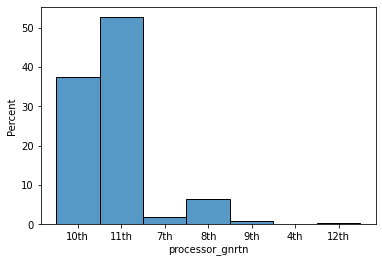

In [11]:
sns.histplot(data = data, x= 'processor_gnrtn', stat = 'percent')

We have dicided to ignore the missing values because there are 26.26% missing valuse

##### Fixing brand column

In [22]:
data['model'].isnull().sum()

95

In [23]:
data.model.unique()

array(['A6-9225', 'Ideapad', 'PURA', 'APU', 'Athlon', 'Aspire',
       'ExpertBook', nan, 'v15', 'VivoBook', 'EeeBook', 'Nitro', 'Cosmos',
       'x360', 'IdeaPad', 'Celeron', '15q', '250-G6', 'Vostro', '15',
       'Pavilion', 'Book', 'Inspiron', 'INBook', 'ThinkPad', 'Chromebook',
       'Commercial', '14s', 'INSPIRON', 'V15', '15s', '3000', 'Notebook',
       'Vivo', 'DA', 'Insprion', 'Travelmate', '14a', 'Predator', 'Spin',
       'Swift', 'ROG', 'XPS', 'Omen', 'Surface', 't.book', 'Yoga', 'Gram',
       'Spectre', 'VivoBook14', 'TUF', 'Book(Slim)', 'Pro', 'PureBook',
       'ASUS', 'Katana', 'GF63', 'Thinkbook', 'Intel', 'G15', 'ZenBook',
       'Legion', 'Modern', 'ThinkBook', 'Prestige', 'Zenbook', 'MacBook',
       'Sword', 'Envy', 'SE', 'ConceptD', 'HP', 'DELL', 'X390', 'Thinpad',
       'Inpiron', 'GAMING', 'GS', '430', 'Liber', 'F17', 'B50-70', 'GE76',
       'GP65', 'GP76', '250', '3511', 'G3', 'GS66', 'X1', 'GF65',
       'Stealth', 'Zephyrus', 'Summit', 'OMEN', 'Pulse', '

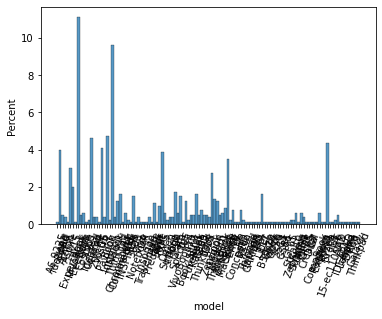

In [24]:
sns.histplot(data = data, x= 'model', stat = 'percent')
plt.xlabel("model")
plt.xticks(rotation=70)
plt.show()

<div>
<img src="images/red.png" width="100"/>
</div>

להחליט גם כאן מה לעשות עם הערכים החסרים

##### fixing display size coloumn

In [16]:
data['display_size'].isnull().sum()

332

<AxesSubplot:xlabel='display_size', ylabel='Percent'>

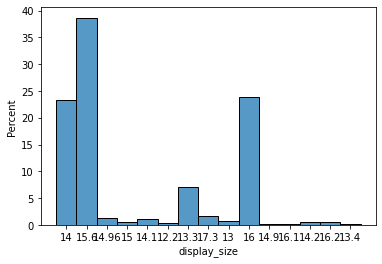

In [17]:
sns.histplot(data = data, x= 'display_size', stat = 'percent')

<div>
<img src="images/red.png" width="100"/>
</div>

להחליט גם כאן מה לעשות עם הערכים החסרים

### 1.3 Fixing specific values

##### Fixing ram_gb column

In [18]:
data.ram_gb.unique()

array(['4 GB GB', '8 GB GB', '32 GB GB', '16 GB GB'], dtype=object)

In [19]:
data['ram_gb'] =data['ram_gb'].replace({'4 GB GB':'4GB','8 GB GB':'8GB','16 GB GB':'16GB','32 GB GB':'32GB'})
data.ram_gb.unique()

array(['4GB', '8GB', '32GB', '16GB'], dtype=object)

### 1.4 Transformations

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            801 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  657 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     564 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

#### 1.4 Noisy data - outliers

We choose only the numeric data because we want to see it in boxplot

Select only numeric columns:

In [25]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [27]:
numeric_features = ['warranty','latest_price','old_price','discount','star_rating','ratings','reviews']

creating 2 melted data frames
1. by brand
2. by model

In [32]:
melted_by_brand = pd.melt(data, id_vars = 'brand', value_vars = numeric_features)
melted_by_brand

,brand,variable,value
0,Lenovo,warranty,0.0
1,Lenovo,warranty,0.0
2,Avita,warranty,0.0
3,Avita,warranty,0.0
4,Avita,warranty,0.0
...,...,...,...
6267,ASUS,reviews,0.0
6268,ASUS,reviews,0.0
6269,ASUS,reviews,0.0
6270,SAMSUNG,reviews,0.0


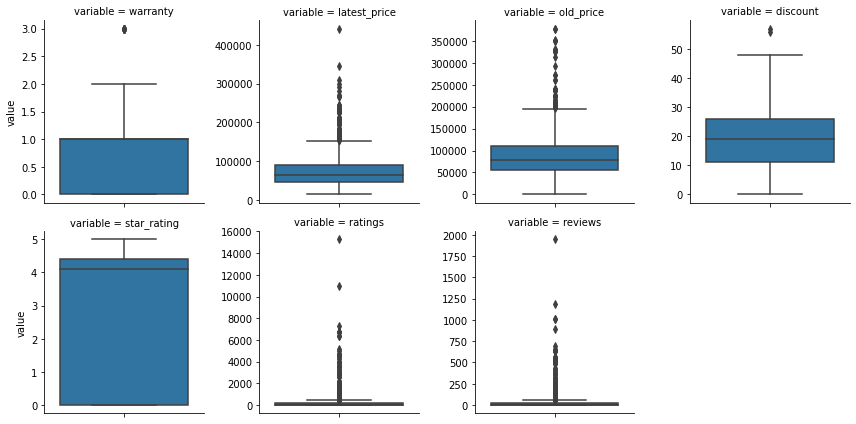

In [33]:
g = sns.FacetGrid(data =melted_by_brand, col='variable',  col_wrap=4,sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

יש מסקנות שאפשר להסיק מכאן?
<div>
<img src="images/red.png" width="100"/>
</div>

In [37]:
melted_by_model = pd.melt(data, id_vars = 'model', value_vars = numeric_features)
melted_by_model

,model,variable,value
0,A6-9225,warranty,0.0
1,Ideapad,warranty,0.0
2,PURA,warranty,0.0
3,PURA,warranty,0.0
4,PURA,warranty,0.0
...,...,...,...
6267,ROG,reviews,0.0
6268,Ryzen,reviews,0.0
6269,Ryzen,reviews,0.0
6270,Galaxy,reviews,0.0


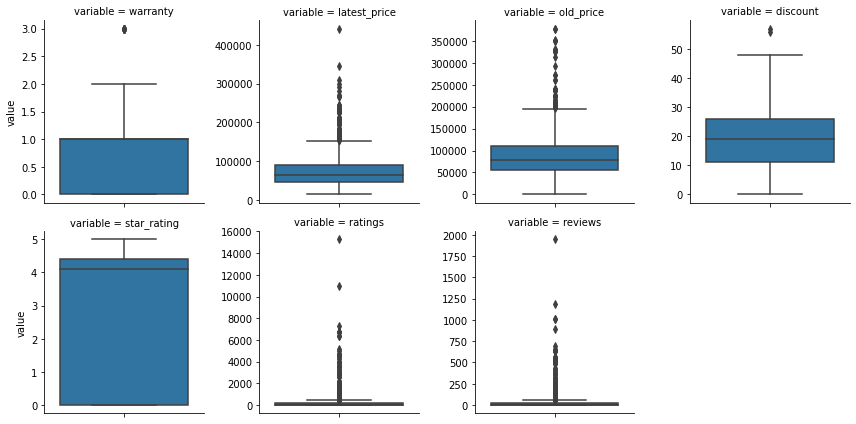

In [38]:
g = sns.FacetGrid(data =melted_by_model, col='variable',  col_wrap=4,sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

#### 2 Understanding the data

Lets look at pur data visually and seee if the data is ready to be corralated(יש מצב שהמצאתי מילה)

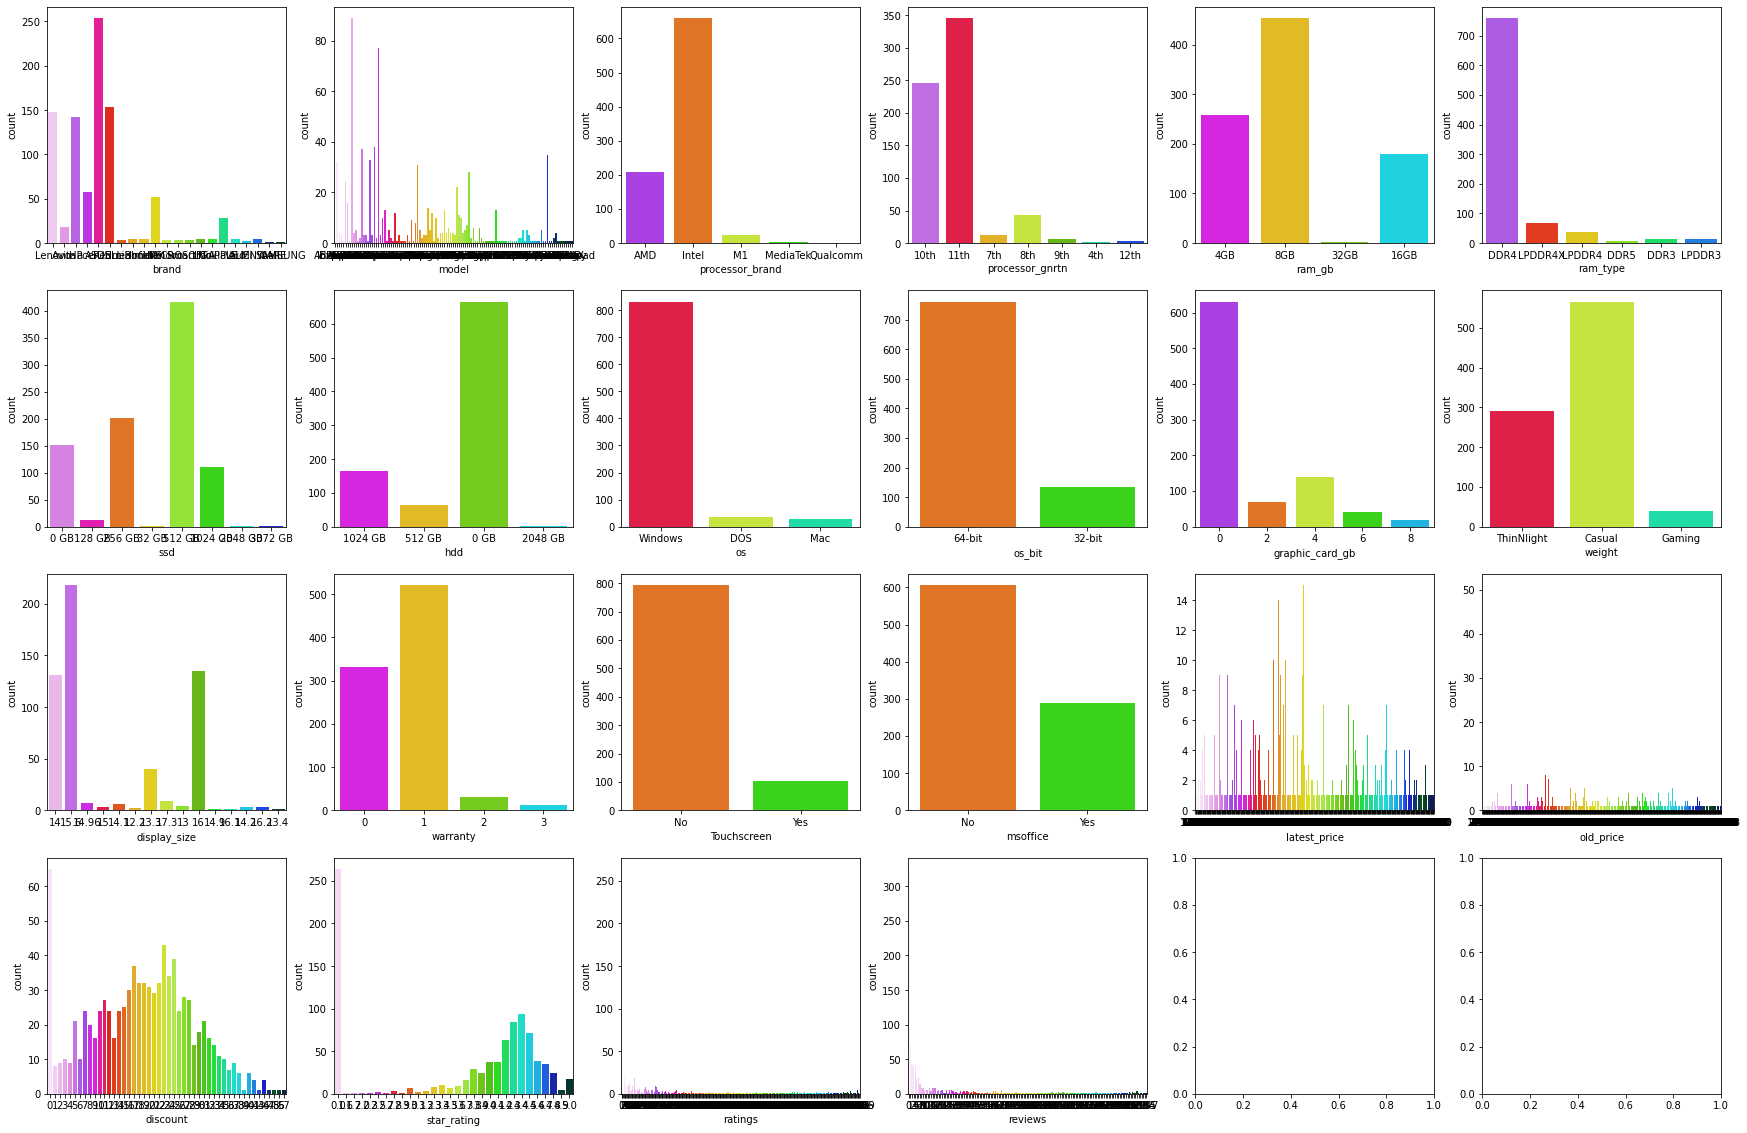

In [53]:
fig, axes = plt.subplots(4,6, figsize=(30,20))
sns.countplot(data = data, x = 'brand', ax = axes[0,0], palette='gist_ncar_r')
sns.countplot(data = data, x = 'model', ax = axes[0,1], palette='gist_ncar_r')
sns.countplot(data = data, x = 'processor_brand', ax = axes[0,2], palette='gist_ncar_r')
sns.countplot(data = data, x = 'processor_gnrtn', ax = axes[0,3], palette='gist_ncar_r')
sns.countplot(data = data, x = 'ram_gb', ax = axes[0,4], palette='gist_ncar_r')
sns.countplot(data = data, x = 'ram_type', ax = axes[0,5], palette='gist_ncar_r')
sns.countplot(data = data, x = 'ssd', ax = axes[1,0], palette='gist_ncar_r')
sns.countplot(data = data, x = 'hdd', ax = axes[1,1], palette='gist_ncar_r')
sns.countplot(data = data, x = 'os', ax = axes[1,2], palette='gist_ncar_r')
sns.countplot(data = data, x = 'os_bit', ax = axes[1,3], palette='gist_ncar_r')
sns.countplot(data = data, x = 'graphic_card_gb', ax = axes[1,4], palette='gist_ncar_r')
sns.countplot(data = data, x = 'weight', ax = axes[1,5], palette='gist_ncar_r')
sns.countplot(data = data, x = 'display_size', ax = axes[2,0], palette='gist_ncar_r')
sns.countplot(data = data, x = 'warranty', ax = axes[2,1], palette='gist_ncar_r')
sns.countplot(data = data, x = 'Touchscreen', ax = axes[2,2], palette='gist_ncar_r')
sns.countplot(data = data, x = 'msoffice', ax = axes[2,3], palette='gist_ncar_r')
sns.countplot(data = data, x = 'latest_price', ax = axes[2,4], palette='gist_ncar_r')
sns.countplot(data = data, x = 'old_price', ax = axes[2,5], palette='gist_ncar_r')
sns.countplot(data = data, x = 'discount', ax = axes[3,0], palette='gist_ncar_r')
sns.countplot(data = data, x = 'star_rating', ax = axes[3,1], palette='gist_ncar_r')
sns.countplot(data = data, x = 'ratings', ax = axes[3,2], palette='gist_ncar_r')
sns.countplot(data = data, x = 'reviews', ax = axes[3,3], palette='gist_ncar_r')
plt.show()

we can see from here 2 things:
1. ssd has 60 laptops with 0gb - which not make scense (לבדוק אנגלית).
2. star ratings contains more than 250 '0 stars' it may be because it is missind and not because people actually gave 0 stars. - we will check later the correlation between stars and rating/reviews.

#### 3 Correlations

Let's divide the information into numerical and categorical variables.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            801 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  657 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     564 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [55]:
categorial_features = ['brand', 'model', 'processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd', 'os','os_bit', 'weight', 'Touchscreen','msoffice']

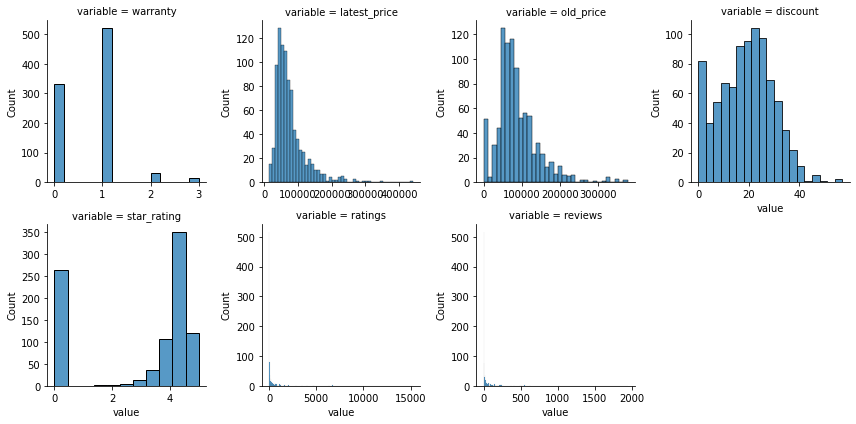

In [56]:
g = sns.FacetGrid(data =melted_by_brand , col="variable", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x = "value")
plt.show()

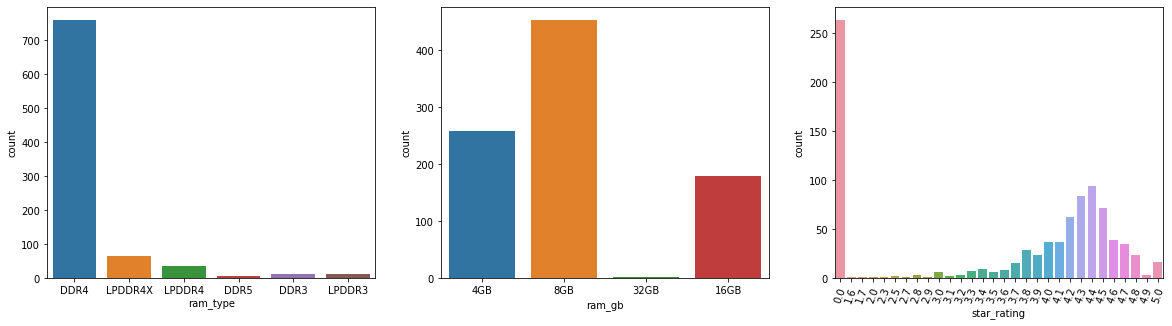

In [57]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.countplot(ax=axes[0], x="ram_type", data=data)
sns.countplot(ax=axes[1], x="ram_gb", data=data)
sns.countplot(ax=axes[2], x="star_rating", data=data)
plt.xticks(rotation = 70)
plt.show()

In [ ]:
#data['Touchscreen'] = data['Touchscreen'].replace({'Yes':1,'No':0})

In [ ]:
#data['msoffice'] = data['msoffice'].replace({'Yes':1,'No':0})

In [67]:
data_groupby_model = data.groupby('model')[numeric_features].mean()
data_groupby_model

,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
model,,,,,,,
14a,0.000000,26470.000000,31532.000000,16.000000,3.600000,232.000000,23.000000
14s,0.800000,49092.000000,57970.800000,13.800000,4.200000,1732.600000,186.000000
15,1.000000,66307.000000,35999.333333,16.000000,2.866667,708.666667,101.333333
15-ec1105AX,1.000000,58990.000000,70172.000000,15.000000,4.500000,1049.000000,134.000000
15q,0.666667,37554.000000,16730.000000,2.000000,4.133333,1242.000000,136.666667
...,...,...,...,...,...,...,...
Zenbook,0.428571,98275.714286,127847.142857,22.571429,1.271429,12.285714,2.285714
Zephyrus,1.000000,205443.800000,102994.000000,13.600000,1.860000,1.600000,0.200000
t.book,0.000000,49656.666667,52662.666667,5.333333,3.633333,27.666667,6.333333


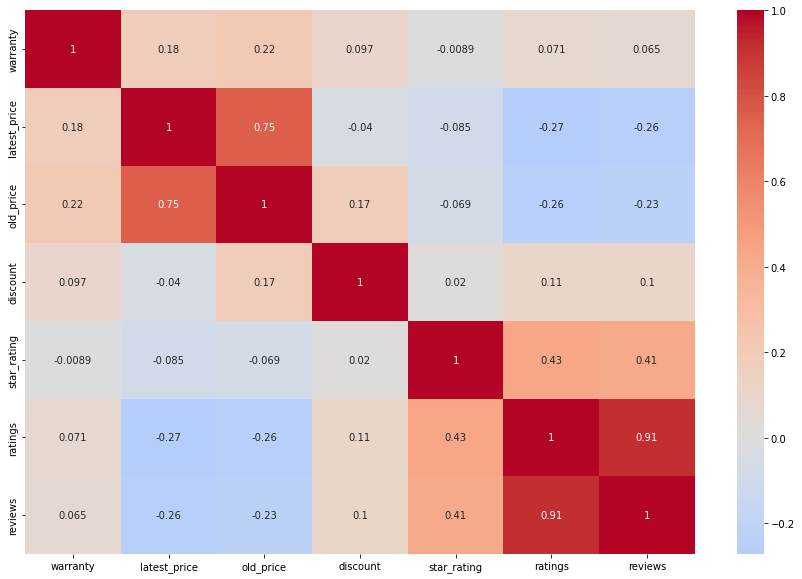

In [68]:
corrs = data_groupby_model.corr(method = 'kendall')
plt.figure(figsize=(15,10))  
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

פה הייתי מתמקדת בקשר השלילי שיש בין המחירים לדירוגים - כי הרי אם הדירוגים גבוהים אז החנות רוצה להוריד פחות מחירים והיא מורידה כנראה... (הביקוש גבוה)

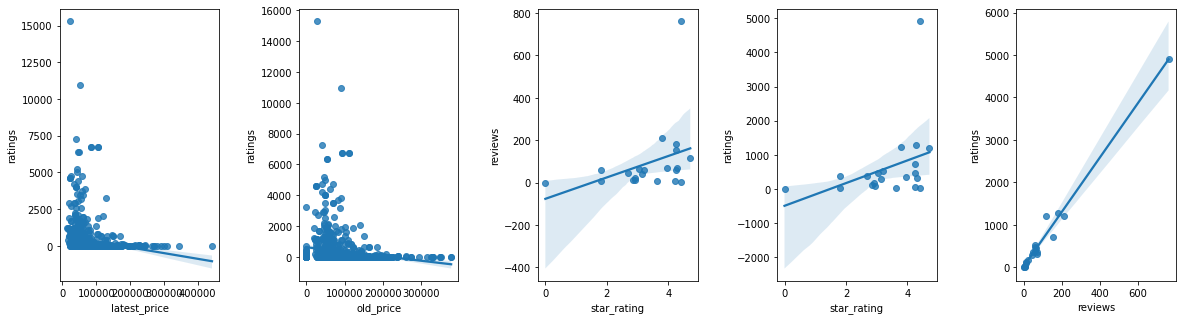

In [88]:
fig, ax = plt.subplots(1,5,figsize=(20, 5))
sns.regplot(x='latest_price', y='ratings', data=data, ax=ax[0])
sns.regplot(x='old_price', y='ratings', data=data, ax = ax[1])
sns.regplot(x='star_rating', y='reviews', data=data_groupby_model, ax = ax[2])
sns.regplot(x='star_rating', y='ratings', data=data_groupby_model, ax = ax[3])
sns.regplot(x='reviews', y='ratings', data=data_groupby_model, ax = ax[4])
plt.subplots_adjust(wspace = 0.5)
#לבדוק כאן איזה קובץ דאטה לשים - המקורי או הגרופבי?
#הערכים משתנים אם משנים בין הגרפים

In [83]:
data_groupby_brand = data.groupby('brand')[numeric_features].mean()
data_groupby_brand

,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
brand,,,,,,,
ALIENWARE,0.000000,257365.000000,283034.250000,8.750000,4.400000,10.000000,2.250000
APPLE,1.000000,151707.857143,163650.000000,7.107143,4.717857,1207.535714,117.535714
ASUS,0.606299,79221.704724,91982.964567,20.799213,2.681496,367.661417,47.440945
Avita,0.000000,55759.111111,65595.555556,16.500000,1.805556,388.777778,57.777778
DELL,0.655844,62029.961039,72650.714286,16.948052,2.863636,122.753247,14.181818
HP,0.774648,71782.330986,75584.014085,12.401408,3.212676,534.478873,61.056338
Infinix,0.000000,40865.000000,57499.000000,29.500000,4.250000,720.500000,152.250000
LG,0.000000,76190.000000,109000.000000,29.600000,1.820000,16.600000,5.400000
Lenovo,0.851351,71924.837838,89509.662162,24.472973,2.914865,171.871622,20.432432


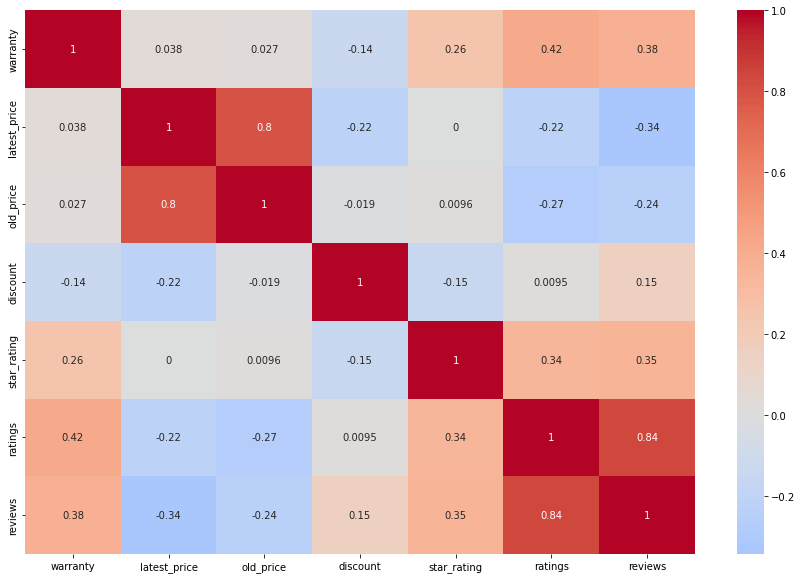

In [84]:
corrs = data_groupby_brand.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

<AxesSubplot:xlabel='reviews', ylabel='ratings'>

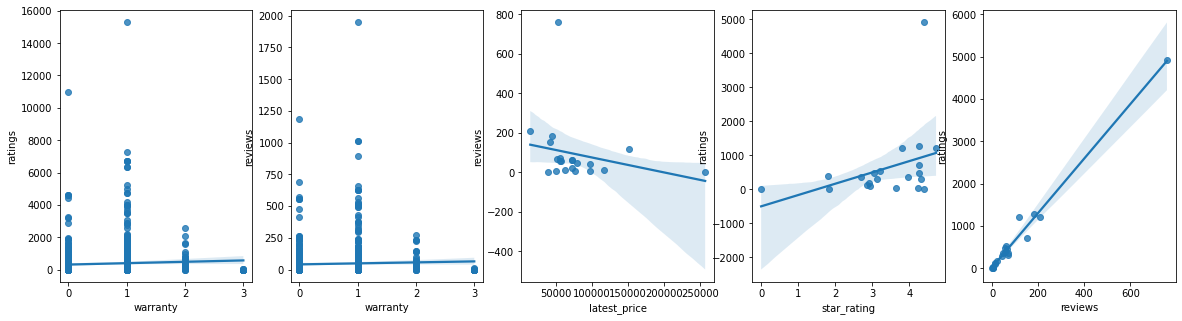

In [90]:
fig, ax = plt.subplots(1,5,figsize=(20, 5))
sns.regplot(x='warranty', y='ratings', data=data, ax=ax[0])
sns.regplot(x='warranty', y='reviews', data=data, ax = ax[1])
sns.regplot(x='latest_price', y='reviews', data=data_groupby_model, ax = ax[2])
sns.regplot(x='star_rating', y='ratings', data=data_groupby_model, ax = ax[3])
sns.regplot(x='reviews', y='ratings', data=data_groupby_model, ax = ax[4])
#פה יש יותר עבודה כדי להבין מה טוב 

## שאריות מקודם

### display size and star ratings 

<AxesSubplot:xlabel='display_size', ylabel='star_rating'>

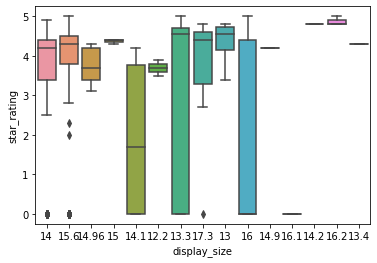

In [91]:
sns.boxplot(data = data, x = 'display_size', y = 'star_rating')

### last price - ram gb

<AxesSubplot:xlabel='ram_gb', ylabel='latest_price'>

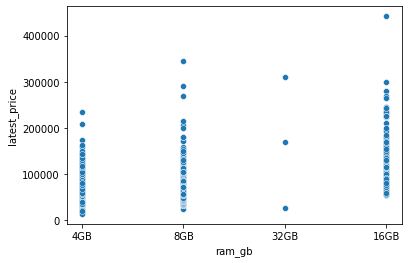

In [95]:
sns.scatterplot(data = data, x = 'ram_gb', y = 'latest_price')

### star rating - ram gb

<AxesSubplot:xlabel='ram_gb', ylabel='star_rating'>

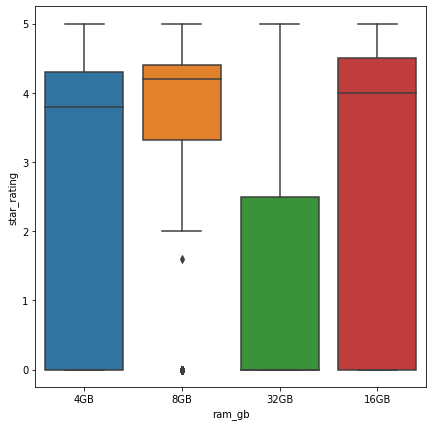

In [96]:
plt.figure(figsize=(7,7))
sns.boxplot(data = data , x = 'ram_gb', y = 'star_rating')

### ratings - ram gb

<AxesSubplot:xlabel='ram_gb', ylabel='ratings'>

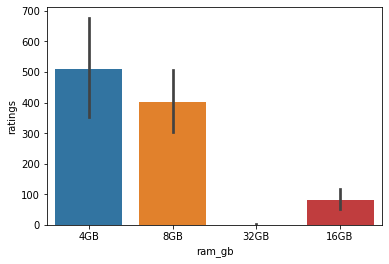

In [97]:
sns.barplot(data = data, x = 'ram_gb', y = 'ratings')

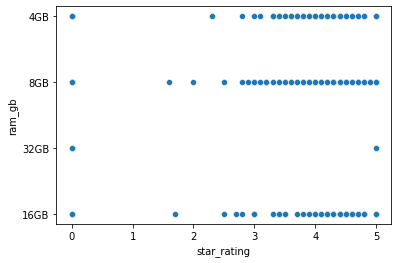

In [101]:
ax = sns.scatterplot(data = data, x = 'star_rating', y = 'ram_gb')

## Catergorial Data

In [105]:
categorial_features

['brand',
 'model',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'weight',
 'Touchscreen',
 'msoffice']

### מפה להמשיך!!!

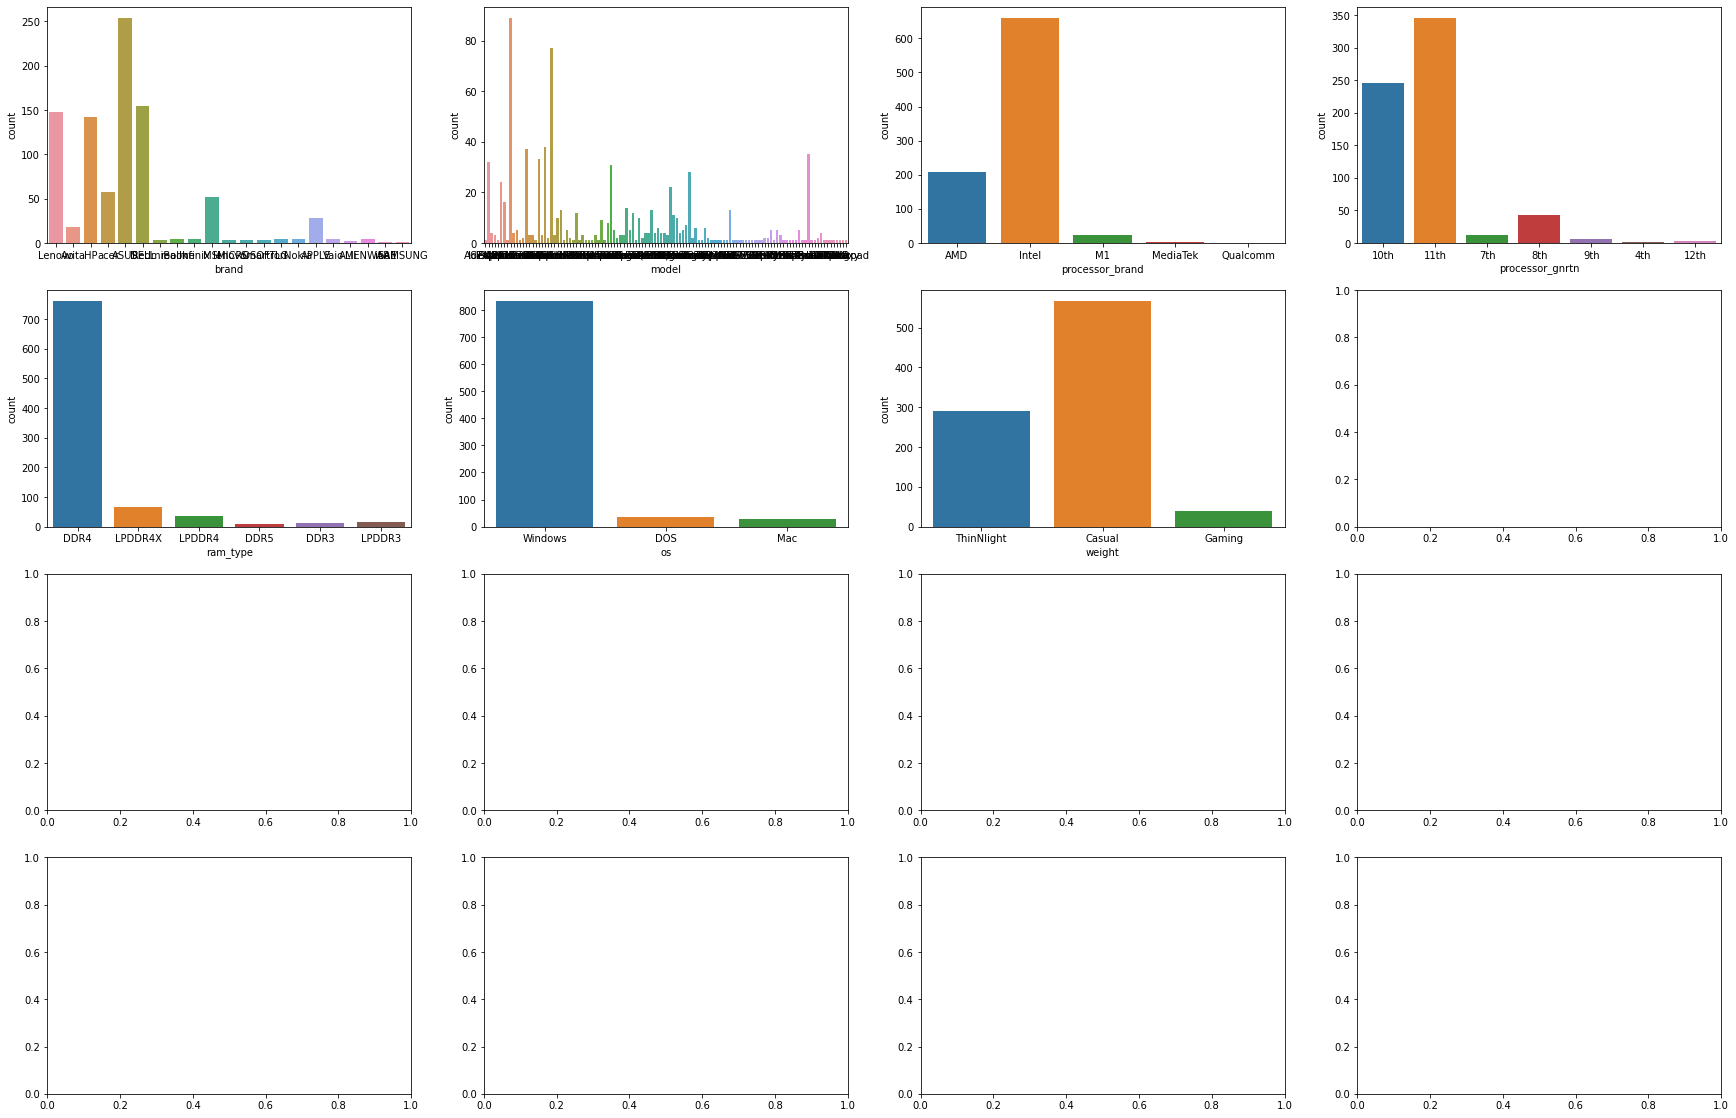

In [108]:
fig, axes = plt.subplots(4,4,figsize=(30,20))
sns.countplot(ax=axes[0,0], x = 'brand', data = data)
sns.countplot(ax=axes[0,1], x = 'model', data = data)
sns.countplot(ax=axes[0,2], x = 'processor_brand', data = data)
sns.countplot(ax=axes[0,3], x = 'processor_gnrtn', data = data)
sns.countplot(ax=axes[1,0], x = 'ram_type', data = data)
sns.countplot(ax=axes[1,1], x = 'os', data = data)
sns.countplot(ax=axes[1,2], x = 'weight', data = data)
plt.show()

In [109]:
features_for_weight = ['weight','ram_gb','ssd','hdd','os_bit','graphic_card_gb','display_size','warranty','latest_price','old_price','discount','star_rating','ratings','reviews']

In [110]:
pros_weight = pd.get_dummies(data[features_for_weight])

In [111]:
pros_weight.head()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews,weight_Casual,weight_Gaming,...,display_size_14.1,display_size_14.2,display_size_14.9,display_size_14.96,display_size_15,display_size_15.6,display_size_16,display_size_16.1,display_size_16.2,display_size_17.3
0,0,0,24990,32790,23,3.7,63,12,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,19590,21325,8,3.6,1894,256,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,19990,27990,28,3.7,1153,159,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,21490,27990,23,3.7,1153,159,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,24990,33490,25,3.7,1657,234,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

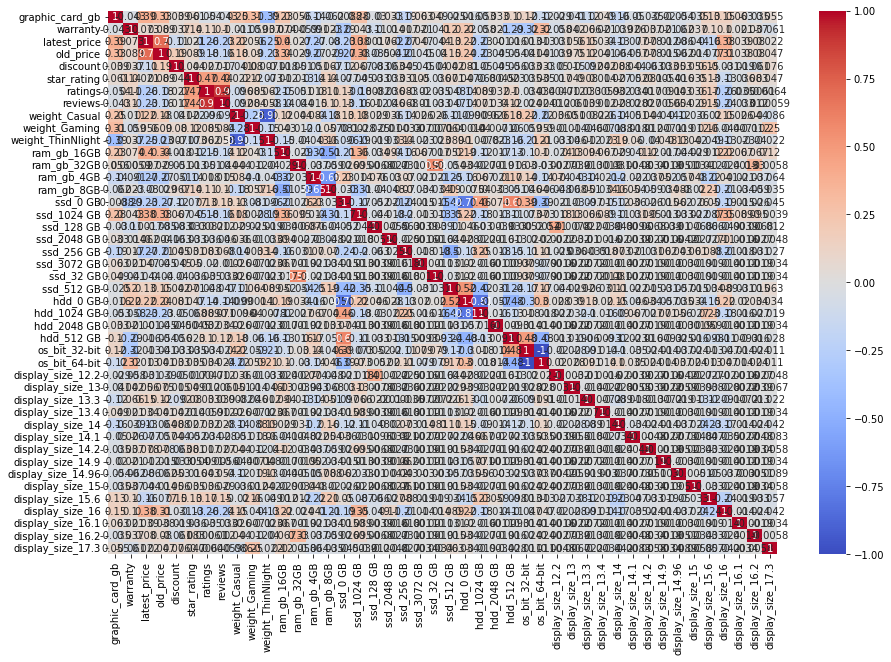

In [114]:
corrs = pros_weight.corr(method = 'kendall')
plt.figure(figsize = (15,10))
sns.heatmap(corrs, cmap='coolwarm',annot = True)

<AxesSubplot:xlabel='graphic_card_gb', ylabel='weight_ThinNlight'>

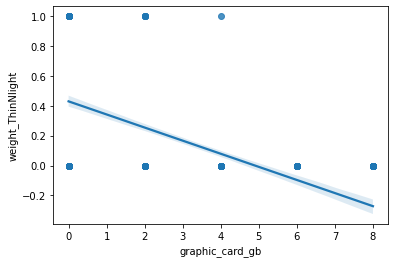

In [113]:
sns.regplot(x='graphic_card_gb', y='weight_ThinNlight',data = pros_weight)